# Examples: Loading data from python into IDV

## 1. A random array, created from scratch
## 2. xarray open a 2D field, send .to_IDV()
## 3. Compute 2D vertical integral from 3D (value added)


In [8]:
%load_ext ipython_IDV  

%load_bundle http://weather.rsmas.miami.edu/repository/entry/get/AnnualCycleGlobeMonthly.xidv?entryid=e3880649-f98a-4126-a437-509bce201d16


In [2]:
import numpy as np
import xarray as xr

## Example 1: Load a random array into IDV

In [4]:
#create a random data and make a xarray dataarray
data=np.random.random((180,360))
data_xr=xr.DataArray(data,dims=['lat','lon'],coords={'lat':range(-90,90),'lon':range(0,360)},name='random') 

In [5]:
data_xr

<xarray.DataArray 'random' (lat: 180, lon: 360)>
array([[0.670093, 0.784377, 0.409137, ..., 0.726175, 0.466415, 0.173591],
       [0.29685 , 0.557347, 0.890125, ..., 0.022452, 0.130703, 0.087429],
       [0.097889, 0.178755, 0.834005, ..., 0.934752, 0.901992, 0.949533],
       ...,
       [0.770955, 0.309456, 0.414089, ..., 0.270197, 0.195103, 0.559949],
       [0.857394, 0.1685  , 0.959192, ..., 0.563705, 0.27302 , 0.550274],
       [0.653033, 0.152847, 0.378471, ..., 0.593272, 0.78419 , 0.521551]])
Coordinates:
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 ...
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [6]:
data_xr.to_IDV() # this data now is located in your datasources of IDV

data loaded


### Now go to IDV Dashboard, Field Selector tab, and make a display

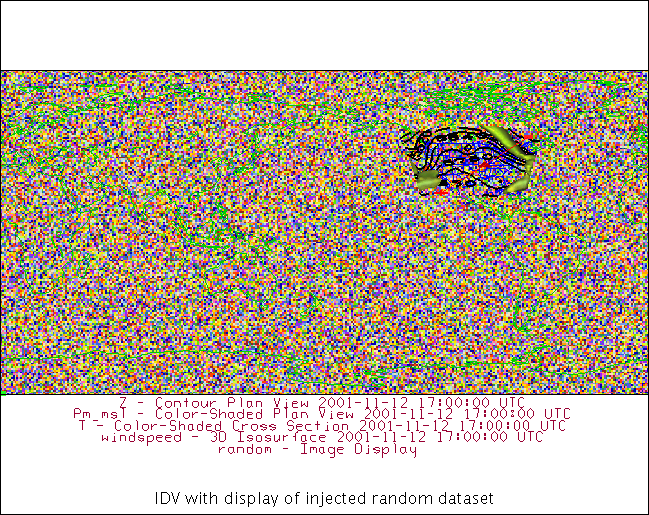

In [10]:
%make_image -caption 'IDV with display of injected random dataset'

--------------
# Example 2
## Open 2D dataset in xarrray, load the data into IDV

In [17]:
# Open NCEP monthly climatology of column water vapor
da_2dPW=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.mon.ltm.nc')
#                   decode_times=False)

OSError: [Errno -68] NetCDF: I/O failure: b'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.mon.ltm.nc'

In [19]:
da_2dPW

In [20]:
# Send dataset into IDV
da_2dPW.to_IDV()

--------------
----------------

# Example 3
## Compute  mass weighted vertical integral of specific humidity 
## and load the data into IDV

In [3]:
# open MERRA2 Reanalysis dataset
#da=xr.open_dataset('https://geodesystems.com/repository/opendap/038361f9-fb9a-484c-9f1d-3623a12a47ca/entry.das') 

# Open NCEP monthly climatology from Mapes IDV collection .ncml aggregation
da=xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/0a9bbf2e-458d-4b7c-ad3a-b450988a0587/entry.das',
                   decode_times=False)

In [4]:
da

<xarray.Dataset>
Dimensions:             (lat: 73, level: 17, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * level               (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 ...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 ...
  * time                (time) float64 -6.571e+05 -6.57e+05 -6.57e+05 ...
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    air                 (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
    hgt                 (time, level, lat, lon) float32 ...
    uwnd                (time, level, lat, lon) float32 ...
    vwnd                (time, level, lat, lon) float32 ...
    omega               (time, level, lat, lon) float32 ...
    shum                (time, level, lat, lon) float32 ...
    rhum                (time, level, lat, lon) float32 ...
 

In [5]:
# Get 3D specific humidity, subset for just 2 time levels. Call it q
q=da.shum.isel(time=slice(0,2)) # just take a small slice of data

In [10]:
# Send whole 3D dataset into IDV
q.to_IDV()

RuntimeError: NetCDF: file not found

# Vertical integral -- not working 

In [12]:
# For a vertical mass integral, get dp/g 
dpbyg=da.level.copy() # make a copy of values
dpbyg.values=-1*np.gradient(da.level*100.0)/9.8

In [16]:
q*dpbyg

RuntimeError: NetCDF: file not found

In [18]:
CWV=(q*dpbyg).sum(dim='level')  #should give Column Water Vapor in mm 
CWV.name='CWV'

In [17]:
CWV.to_IDV() #this data is in data sources, manually create a display

data loaded


In [19]:
# Operate the IDV to create a display of the new data, then %make_image